<a href="https://www.kaggle.com/code/ampiiere/titanic-survival-prediction-eda-machine-learning?scriptVersionId=91244627" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Outline:
- Light data exploration
- Data Cleaning
- Feature Engineering
- Data Preproccessing
- Model Building
- Model Tuning
- Predictions!
- Submission

In [2]:
training = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

# initializing training and testing sets, create full data df for easier data preproccessing. 
training['train_test'] = 1
test['train_test'] = 0
test["Survived"] = np.NaN
full_data = pd.concat([training, test])

full_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
# Project planning

# Light exploration of data
    # Averages, nans, Cat/numeric variabels?
    # correlations between variables?
        # seperate variables into cat/numeric
        # Numerics: Histograms, corrplots, pivot tables
        # Cats: bar charts, pivot tabes
        
    # Quesitons:
    # Rich more likely to survive?
    # Age/Sex: women and children?
    # title/station?
    # Cabins?
# Featre engineering
# Preproccessing the data: impute Nans, dummy categorical variables, drop useless rows(those who havene't embarked)
    # Scale probably
# Models
# Model tuning

info(), Describe()

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Cabin and Age have some Null values.

Name Sex Ticket Cabin and Embarked are Categorical variables. 

In [5]:
# storing numeric and categorical data seperately
num_df = training[['Age', 'SibSp', 'Parch', 'Fare',]]
cat_df = training[['Pclass', 'Sex', 'Ticket', "Cabin", "Embarked"]]

In [6]:
training.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.0
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.0
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.0
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.0
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.0
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.0
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.0


Average age of 29.6, 0.5 sibilings, 0.3 parents/children(not a lot of families on board), fare of 32(when the highest is 512, minimum is 0)

### Numeric and Categorical data Exploration

### 1. Numeric
- Histograms: do we need scaling??
- corrplots: correlation between metrics
- pivot table: to look at variables' relationship to dependent variable

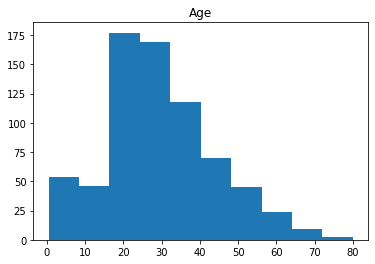

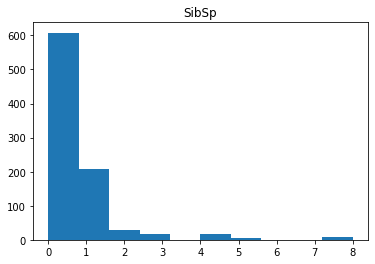

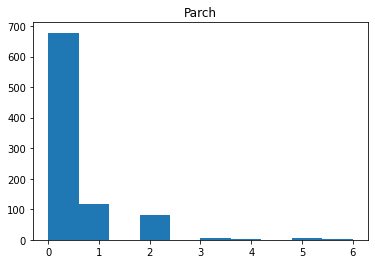

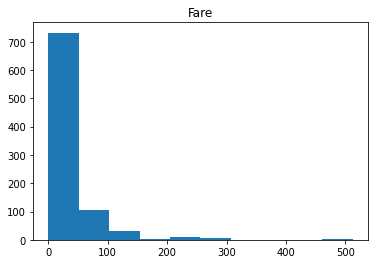

In [7]:
for col in num_df.columns:
    plt.hist(num_df[col])
    plt.title(col)
    plt.show()

Age distribution seems normally distributed
but Fare, parent/child, and siblings do not, may need to normalize?

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

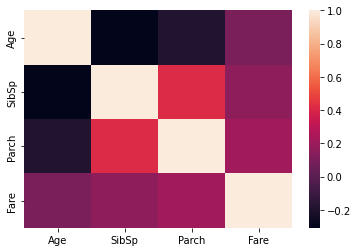

In [8]:
num_df_corr = num_df.corr()
print(num_df_corr)
sns.heatmap(num_df_corr)

negative correlations between parent/child, sibilings and age(as expected)

Parent/child and sibilings have strong correlation(as expected)

The other moderately correlated variables are parent/child and fare, parents abroad with children are able and willing to pay for more expensive fare?

In [9]:
# Relationship of metrics to survival rates
pd.pivot_table(training, index="Survived", values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Younger people seem to survive, those able to afford pricier fares have higher survival rates, those with parent/children aboard have higher survival rate, having a sibiling aboard lowers your survival rate.

### 2. Categorical Variables

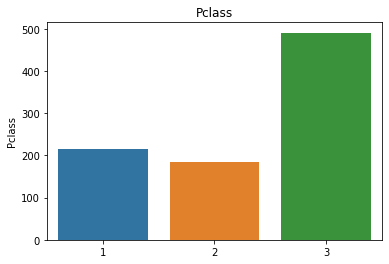

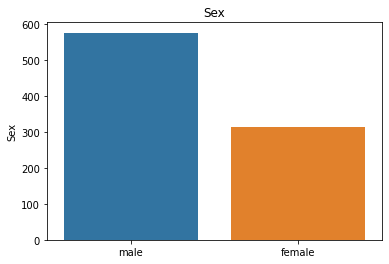

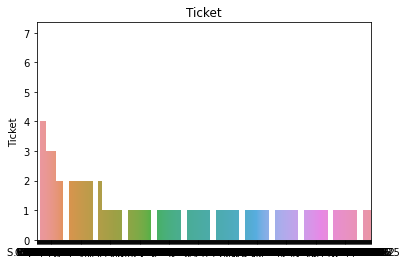

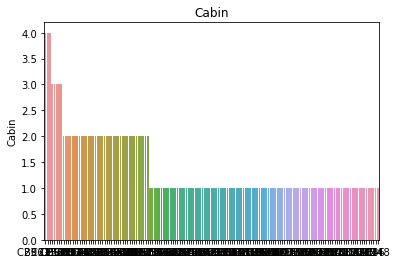

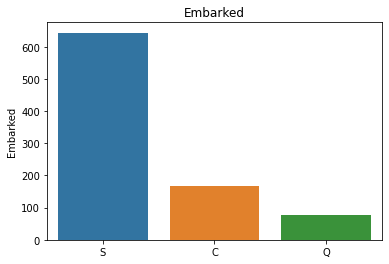

In [10]:
for col in cat_df.columns:
    sns.barplot(x=cat_df[col].value_counts().index, y=cat_df[col].value_counts())
    plt.title(col)
    plt.show()

Cabin Data and Ticket data definitely need to be fixed!!

In [11]:
# pivot table of non-messy cat variables
cat_col_names = ['Pclass', 'Sex', "Embarked"]
for col in cat_col_names:
    print(pd.pivot_table(training, index = 'Survived', values = 'Ticket', columns=col, aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


As expected, 3rd class passengers were much more likely to not survive compared to other classes. 
A much larger proportion of male passengers perished than female passengers. 
passengers from S have a higher rate of death than the other two. 

### Feature Engineering
- Clean up cabins column: seperate by first letter as it may indicate position on the ship. Some passengers have multiple cabins!
- Tickets: some ticket contain letters, and some don't. Seperation by length(length difference largley due to the existience of non-numerics in some tickets)?
- Title of Names indicate profession(Married, professions relationship to survival rate?)

#### 1. Cabins

In [12]:
# whether they have multiple cabins
training["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split())).value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin, dtype: int64

Null values are likely people who didn't have and couldn't afford cabins.

In [13]:
# making new "cabin count" column
training["cabin_counts"] = training["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [14]:
# Relationship between survival rate and cabin counts?
pd.pivot_table(training, index="Survived", columns='cabin_counts', values='Ticket', aggfunc='count')

cabin_counts,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


A much higher proportion of those with higher cabin counts survived, compared to those who had only 1, or didn't have any at all. 

In [15]:
# compare cabin counts with passenger class and fare?
training[["cabin_counts", "Fare", "Pclass"]].corr()

,cabin_counts,Fare,Pclass
cabin_counts,1.000000,0.596171,-0.647116
Fare,0.596171,1.000000,-0.549500
Pclass,-0.647116,-0.549500,1.000000


<AxesSubplot:>

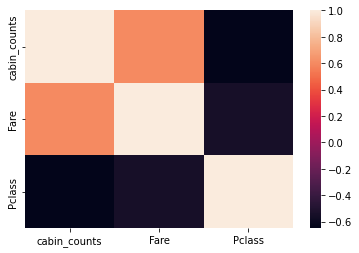

In [16]:
sns.heatmap(training[["cabin_counts", "Fare", "Pclass"]].corr())

Cabin counts is negatively related to Passenger class(1st class have more cabins), and postively related to Fare. It does seem the rich aboard are able to afford more cabins, and the reason why there were so many Null values is becuase 3rd class passengers were not able to afford a cabin at all. 

Null values in this category can be made into a value of its own as it represents data!

In [17]:
# Which section of the ship are they from?
training['Cabin'].apply(lambda x: str(x)[0]).value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [18]:
# creating new column to indicate which section of cabins passengers were staying in. 
training["cabin_alph"] = training['Cabin'].apply(lambda x: str(x)[0])
pd.pivot_table(training, index="Survived", values="Ticket", columns='cabin_alph', aggfunc='count')

cabin_alph,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Since the majority of passengers didn't have a cabin, given how little cabin region data there is, its hard to come to the conclusion that passengers staying in certain regions of cabins have lower survival rate. 

Nevertheless, region B, D, E have the highest survival rates out of all cabins. And those who didn't have a cabin had the lowest survival rate. 

#### 2. Tickets
- numeric tickets
- ticket letters

In [19]:
# Checking and creating new column for numeric tickets and non-numeric tickets
training["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0).value_counts()

1    661
0    230
Name: Ticket, dtype: int64

In [20]:
training['ticket_numeric'] = training["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)

In [21]:
pd.pivot_table(training, index='Survived', values='Ticket', columns='ticket_numeric', aggfunc='count')

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


The percentage is survival rate of non-numeric and numeric tickets is about the same, around 38%. 

In [22]:
# New column for tickets with unique chars other than numbers (not used)
training ['ticket_chars'] = training["Ticket"].apply(lambda x:''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if x.split(' ')[:-1] else 0)
training['ticket_chars'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_chars, dtype: int64

The cardinality of this categorical variable may be too much, especially if we are using dummy/onehotencoder

In [23]:
pd.set_option("max_rows", None)
pd.pivot_table(training, index='Survived', columns='ticket_chars', values='Ticket', aggfunc='count')

ticket_chars,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### 3. Name title
- name_title
-profession

In [24]:
# obtain the titles of all passengers
training['name_title'] = training["Name"].apply(lambda x: x.split(',')[1].strip().split('.')[0].strip())
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [25]:
training['name_title'].value_counts().index

Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Mlle', 'Major', 'Col',
       'the Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'],
      dtype='object')

In [26]:
def assign_class(x):
    profession = ['Master', 'Dr', 'Rev','Major', 'Col','Capt']
    h_class = ['Mlle', 'the Countess', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer']
    l_class = ['Mr', 'Miss', 'Mrs', 'Ms']
    
    if x in profession:
        return 3
    elif x in h_class:
        return 2
    else:
        return 1

training['name_title'].apply(lambda x: assign_class(x)).value_counts()

1    825
3     58
2      8
Name: name_title, dtype: int64

In [27]:
# making new column for profession or class: smaller numbers mean lower class. 
training['prof_class'] = training['name_title'].apply(lambda x: assign_class(x))
training['prof_class'].value_counts()

1    825
3     58
2      8
Name: prof_class, dtype: int64

In [28]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'cabin_counts', 'cabin_alph', 'ticket_numeric', 'ticket_chars',
       'name_title', 'prof_class'],
      dtype='object')

## Data Preproccessing
- Create Categorical variables for all data
- Drop null rows in embarked(unknown if they were onboard)
- Impute Nulls in continous variables
- Categorical Transformations on data: dummy variables
- Normalize fare and Sibsp
- Include only relevent variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_alph', 'cabin_counts', 'ticket_numeric', 'name_title', 'prof_class
- Scale data 0-1

In [29]:
# creating new variables for all data
def assign_class(x):
    profession = ['Master', 'Dr', 'Rev','Major', 'Col','Capt']
    h_class = ['Mlle', 'the Countess', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer']
    l_class = ['Mr', 'Miss', 'Mrs', 'Ms']
    
    if x in profession:
        return 3
    elif x in h_class:
        return 2
    else:
        return 1

full_data["cabin_counts"] = full_data["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
full_data["cabin_alph"] = full_data['Cabin'].apply(lambda x: str(x)[0])
full_data['ticket_numeric'] = full_data["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)
full_data['name_title'] = full_data["Name"].apply(lambda x: x.split(',')[1].strip().split('.')[0].strip())
full_data['prof_class'] = full_data['name_title'].apply(lambda x: assign_class(x))

In [30]:
# drop rows that have null values in embarked
full_data.dropna(subset=['Embarked'], inplace=True)

# impute null values in continous variables: fare and age, using median for both as both distributions are skewed. 
full_data["Fare"] = full_data["Fare"].fillna(training["Fare"].median())
full_data["Age"] = full_data["Age"].fillna(training["Age"].median())

(array([ 17.,   0.,   3., 514., 251., 261., 129.,  78.,  50.,   4.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

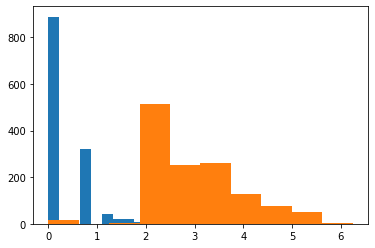

In [31]:
# normalizing fare and SibSp: with np.log(+1)
plt.hist(np.log(full_data['SibSp']+1))
plt.hist(np.log(full_data["Fare"]+1))

In [32]:
# Normalized sibsp does not look normalized.. we'll forgo the normalization. 
full_data['norm_fare'] = np.log(full_data["Fare"]+1)

<AxesSubplot:>

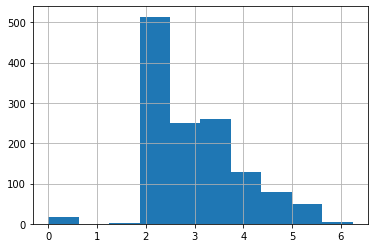

In [33]:
full_data['norm_fare'].hist()

In [34]:
# convert Pclass back into string for pd.getdummies
full_data['Pclass'] = full_data['Pclass'].astype(str)
full_data['prof_class'] = full_data['prof_class'].astype(str)

In [35]:
# dummy variables for categorical variables
# only relevent variables
all_my_dummies = pd.get_dummies(full_data[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'train_test','cabin_counts', 'cabin_alph', 'ticket_numeric','prof_class', 'name_title','norm_fare']])

In [36]:
all_my_dummies['train_test'].value_counts()

1    889
0    418
Name: train_test, dtype: int64

In [37]:
# split to train and test again, save results y in y_train seperate from X_train. 
X_train = all_my_dummies[all_my_dummies.train_test == 1].drop(['train_test'], axis=1)
X_test = all_my_dummies[all_my_dummies.train_test == 0].drop(['train_test'], axis=1)

y_train = full_data[full_data.train_test == 1]['Survived']

In [38]:
# Scaling numeric data! scaling the dummy data first, then moving scaled dummy data to X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_dummies_scaled = all_my_dummies.copy()
all_dummies_scaled[["Age", "SibSp", "Parch", "norm_fare"]] = scaler.fit_transform(all_dummies_scaled[["Age", "SibSp", "Parch", "norm_fare"]])

<AxesSubplot:>

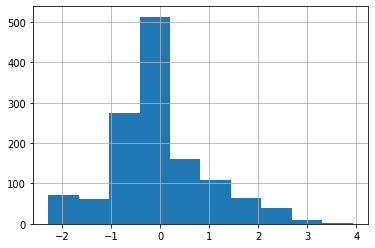

In [39]:
all_dummies_scaled["Age"].hist()

In [40]:
# Scaled data in X_train_scaled and X_test_scaled, split prediction results from X_train for model valdiation 
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = full_data[full_data.train_test == 1]['Survived']

<AxesSubplot:>

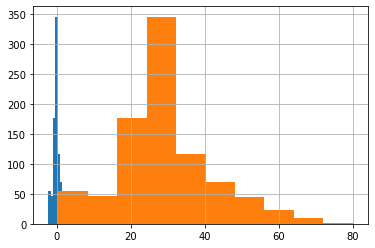

In [41]:
# checking if X_train_scaled and X_train are created properly...
X_train_scaled["Age"].hist()
X_train["Age"].hist()

## Model Building!
Using cross_val_score to evaluate different model's performance on data. Starting with no params a all!
- Naive bayes
- Logistic Regression 
- Decision Tree 
- K Nearest Neighbor 
- Random Forest 
- Support Vector Classifier
- Xtreme Gradient Boosting
- Soft Voting Classifier - Combining All Models

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
# baseline performance with dummy classfier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent')
cv_score = cross_val_score(clf, X_train_scaled, y_train)
print(cv_score)
print(cv_score.mean())

[0.61797753 0.61797753 0.61797753 0.61797753 0.61581921]
0.6175458642798197


In [44]:
# Gaussian Naive Bayes:scaled
gnb = GaussianNB()
cv_score = cross_val_score(gnb, X_train_scaled, y_train)
print(cv_score)
print(cv_score.mean())

[0.68539326 0.71348315 0.7752809  0.76404494 0.73446328]
0.7345331048054339


In [45]:
# Logistic Regression: scaled
lr = LogisticRegression(max_iter=2000)
cv_score = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.8258427  0.80898876 0.79775281 0.82022472 0.85310734]
0.8211832666793626


In [46]:
# Decision tree: scaled
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.83707865 0.76404494 0.82485876]
0.786320066019171


In [47]:
# K nearest neighbour: scaled
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled ,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74719101 0.75280899 0.8258427  0.76404494 0.81920904]
0.7818193359994922


In [48]:
# Random Forest Classfier: scaled
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.78651685 0.85393258 0.75280899 0.81355932]
0.8065320891258807


In [49]:
# Support vector machines: scaled
svc = SVC()
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.57865169 0.71348315 0.67977528 0.68539326 0.68361582]
0.6681838379991113


something clearly went wrong here...

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1, eval_metric='rmse', verbosity=0, silent=True, use_label_encoder=False)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5, )
print(cv)
print(cv.mean())

[0.83146067 0.82022472 0.87640449 0.78651685 0.82485876]
0.8278930997270362


In [51]:
# Voting Classifiers! Combining all classifier evaluations, aggregating all model's findings to make predictions. 
# soft voting so each model votes on confidence rather than a hard T/F. 
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb), ('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.81460674 0.83707865 0.80898876 0.85875706]
0.8256839966990415


## Initial Submission: fitting voting model and submissions

In [52]:
voting.fit(X_train_scaled, y_train)
predictions = voting.predict(X_test_scaled)

In [53]:
predictions = predictions.astype(int)
submission_dict = {'PassengerId':test.PassengerId, 'Survived':predictions}
initial_sub = pd.DataFrame(submission_dict)

In [54]:
initial_sub.to_csv('initial_submission.csv', index=False)

## Model Tuning
- Tuning parameters of model with GridSearchCV and RandomizedSearch CV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 

In [56]:
# Classifier performance evaluater
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [57]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr, "Logistic Regression")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8268139402018664
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [58]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn, "KNeighborsClassifier")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNeighborsClassifier
Best Score: 0.7953278740557355
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [59]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8245540531962167
Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [60]:
# random forest
# First narrowing down good params with randomized search, then use gridsearch fromm best model from results

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.8335364692439535
Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 75, 'bootstrap': True}


In [61]:
# TODO change to match beset params from random forest. 
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [10],
                                  'max_features': ['sqrt'],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest
Best Score: 0.8335364692439535
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


<AxesSubplot:>

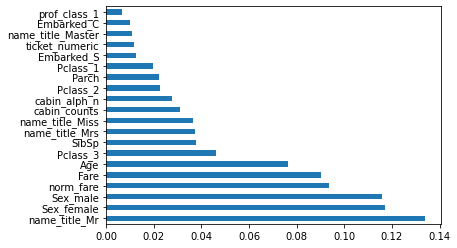

In [62]:
# Which features contribute the most to the prediction?
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Choosing Classifer
Random forest Classifier seems to be my best performing classfier, and the Name title: Mr, along with female sex seem to be the best predictor of survival rate amongst all features. 

In [63]:
y_hat_rf = best_clf_rf.best_estimator_.predict(X_test_scaled).astype(int)
rf_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission_rf = pd.DataFrame(data=rf_submission)
submission_rf.to_csv('rf_submission3.csv', index=False)

## Ending Notes
Much thanks to Ken Jee's tutorial https://www.youtube.com/watch?v=I3FBJdiExcg, which has allowed me to understand how a Data scientist goes through a Data analyasis project, and learnt many new interesting concepts. 